In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing import text
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
%matplotlib inline

2023-02-07 01:19:00.989948: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-07 01:19:01.112865: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-07 01:19:01.112886: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-07 01:19:01.820633: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
df = pd.read_csv(r'feature_extracted_data/train.csv')
df1 = pd.read_csv(r'feature_extracted_data/test.csv')

In [3]:
df

,URL,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Non-standard_Doubleslash,https_Domain,Shortened_URL,Hyphen_Count,DNS_Record,Comb_5y_interest,Domain_Age,Domain_Active,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,http://superuser.com/questions/694540/windows-...,superuser.com,0,0,97,3,0,0,0,0,1,2041,9940,1,0,0,0,1,0
1,http://bdnews24.com/bangladesh/2015/05/14/bdne...,bdnews24.com,0,0,113,5,0,0,0,0,1,11617,6717,1,1,0,0,1,0
2,https://codepen.io/anon/embed/QbNqgv?height=30...,codepen.io,0,0,112,3,0,1,0,0,1,9155,3979,1,0,0,0,0,0
3,http://kakaku.com/pc/note-pc-battery/ranking_0...,kakaku.com,0,0,84,6,0,0,0,0,1,8778,8960,1,1,0,0,2,0
4,http://kienthuc.net.vn/hoi-dap-ve-tuyen-sinh/c...,kienthuc.net.vn,0,0,111,2,0,0,0,0,1,3218,0,2,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://my-metamessk.com/imports/,my-metamessk.com,0,0,33,1,0,1,0,1,1,0,14,1,2,2,2,-1,1
9996,https://dwvjqx.webwave.dev/?inf_contact_key=c3...,dwvjqx.webwave.dev,0,0,76,0,0,1,0,0,1,0,1427,1,0,0,0,0,1
9997,https://verify-i-cloud.mipaginaweb.us/expire/,verify-i-cloud.mipaginaweb.us,0,0,45,1,0,1,0,2,1,0,156,1,0,0,0,0,1
9998,https://objectstorage.ap-tokyo-1.oraclecloud.c...,objectstorage.ap-tokyo-1.oraclecloud.com,0,0,96,6,0,1,0,2,1,0,5082,1,0,0,1,0,1


In [4]:
tokens = text.Tokenizer()
tokens1 = text.Tokenizer()
tokens.fit_on_texts(df['URL'])
tokens1.fit_on_texts(df['Domain'])

df['URL'] = tokens.texts_to_matrix(df['URL'])
df['Domain'] = tokens.texts_to_matrix(df['Domain'])
df1['URL'] = tokens.texts_to_matrix(df1['URL'])
df1['Domain'] = tokens.texts_to_matrix(df1['Domain'])

In [5]:
x_train = df.iloc[:,0:18]
y_train = df.iloc[:,18]
x_test = df1.iloc[:,0:18]
y_test = df1.iloc[:,18]

In [6]:
clf = DecisionTreeClassifier(max_depth=2, random_state=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2)

[Text(198.4, 308.0, 'X[11] <= 238.5\ngini = 0.5\nsamples = 10000\nvalue = [5000, 5000]'),
 Text(99.2, 184.79999999999998, 'gini = 0.0\nsamples = 4546\nvalue = [0, 4546]'),
 Text(297.6, 184.79999999999998, 'X[4] <= 82.5\ngini = 0.153\nsamples = 5454\nvalue = [5000, 454]'),
 Text(198.4, 61.599999999999966, 'gini = 0.0\nsamples = 246\nvalue = [0, 246]'),
 Text(396.8, 61.599999999999966, 'gini = 0.077\nsamples = 5208\nvalue = [5000, 208]')]

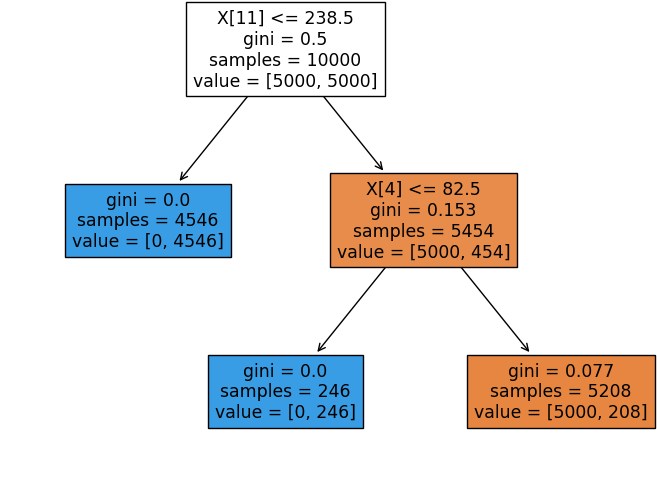

In [7]:
plot_tree(clf, filled=True)

In [8]:
y_pred = clf.predict(x_test)

In [9]:
metrics.accuracy_score(y_test, y_pred)*100

97.7